In [1]:
# Suppress warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

import os
os.environ['PROJ_LIB']=r'/home/weikangqian/.conda/envs/AIRS/share/proj' # path to the proj4 folder.
os.environ['GDAL_DATA']=r'/home/weikangqian/.conda/envs/AIRS/share' # path to the proj4 folder.

# Direct access
import s3fs

# datetime
import datetime as dt

# api to read files
import xarray as xr
import h5py
import gzip
import pyart

# data process
import numpy as np
import pandas as pd

# plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# For example, if you want to print the structure of a HDF5 file you can use the following code:
def h5printR(item, leading = ''):
    for key in item:
        if isinstance(item[key], h5py.Dataset):
            print(leading + key + ': ' + str(item[key].shape))
        else:
            print(leading + key)
            h5printR(item[key], leading + '  ')

In [2]:
url_parents = 's3://noaa-nexrad-level2/' # the format of the full url is s3://bucket/yyyy/mm/dd/Radar_id/filename
yyyy = '2015'
mm = '05'
dd = '16'
Radar_id = 'KTLX'
url_radar_search = url_parents + yyyy + '/' + mm + '/' + dd + '/' + Radar_id + '/' # the format of the full url is s3://bucket/yyyy/mm/dd/Radar_id/filename

In [3]:
s3 = s3fs.S3FileSystem(anon=True) # connect to s3

In [4]:
url_radar_date = s3.ls(url_radar_search) # list all the files in the folder
url_radar_date[170]  # time: 16:43:47

'noaa-nexrad-level2/2015/05/16/KTLX/KTLX20150516_000003_V06.gz'

In [10]:
aws_nexrad_level2_file = ('s3://'+url_radar_date[170]) # the format of the full url is s3://bucket/yyyy/mm/dd/Radar_id/filename
radar = pyart.io.read_nexrad_archive(aws_nexrad_level2_file) # read the file
list(radar.fields) # list all the fields/variables in the file

['cross_correlation_ratio',
 'differential_phase',
 'spectrum_width',
 'reflectivity',
 'velocity',
 'differential_reflectivity']

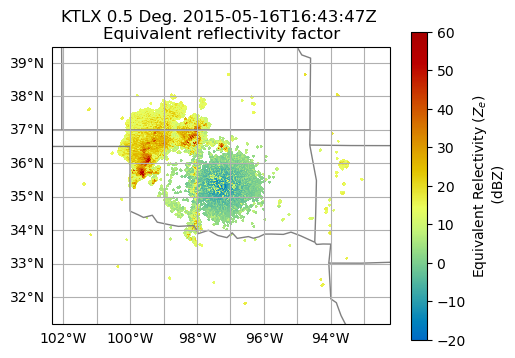

In [11]:
fig = plt.figure(figsize=(12, 4))
display = pyart.graph.RadarMapDisplay(radar)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

display.plot_ppi_map(
    "reflectivity",
    sweep=0,
    ax=ax,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    vmin=-20,
    vmax=60,
)

In [12]:
radar.longitude['data']

array([-97.27776337])